Text(0, 0.5, 'Sales')

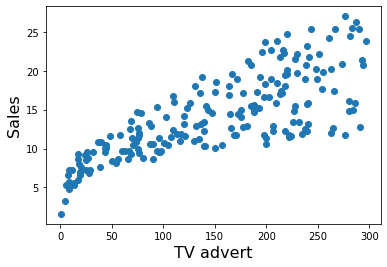

In [ ]:
import numpy as np
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd
#Importing the dataset
data = pd.read_csv("dataset/Advertising.csv")
data.head()
x=data['TV'].values
y=data['Sales'].values
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
#plt.savefig("TVSales.pdf")


### Excercise 3

In [ ]:
#First model | SALES FORECAST
regmodel=pm.Model()
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)

    sigma = pm.Uniform('sigma',0.0001,20)
    mu = pm.Deterministic('mu', beta * x + alpha)

    yo=pm.Normal('Like',mu,sigma,observed=y)

with regmodel:
    samples=pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:06<00:00, 3214.76draws/s]
The acceptance probability does not match the target. It is 0.8806553089275971, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9019714424182137, but should be close to 0.8. Try to increase the number of tuning steps.


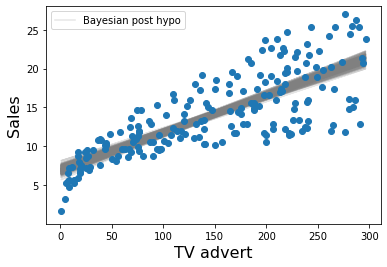

In [ ]:
for i in range(200):
    plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.2)
plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.2, label='Bayesian post hypo')
#plt.plot(x,x*samples['beta'].mean()+samples['alpha'].mean(),c='orange')
#plt.plot(x,x*val[1]+val[0],c='orange',label='MLE')
plt.scatter(x,y,zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.ylim([0.01,28])
plt.legend()

What is the difference between this model and the previous one?

Text(0, 0.5, 'Sales')

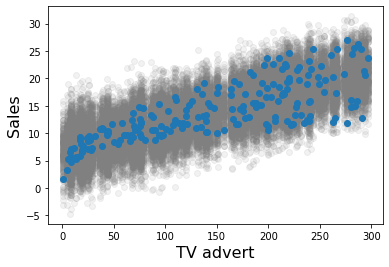

In [ ]:
xx=x
for i in range(200):
    plt.scatter(xx,pm.Normal.dist(xx*samples['beta'][i]+samples['alpha'][i],samples['sigma'][i]).random(1),c='gray',alpha=0.1)#regression line
plt.scatter(x,y,Zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)

## Second Model

In [ ]:
regmodel=pm.Model()
import theano.tensor as tt
with regmodel:
    alpha = pm.Normal('alpha',.0,30)
    beta  = pm.Normal('beta',.0,30)

    sig1 = pm.Uniform('sig1',.0001,20)
    sig2 = pm.Uniform('sig2',.0001,20)

    z = beta*x+alpha
    sig = pm.Deterministic('sig', sigma1 + x * sigma2)
    
    pm.Normal('Like', z, sigma, observed=y)

with regmodel:
    samples=pm.sample(10000,tune=3000,chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma2, sigma1, beta, alpha]
Sampling chain 0, 0 divergences: 100%|██████████| 13000/13000 [00:11<00:00, 1138.03it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


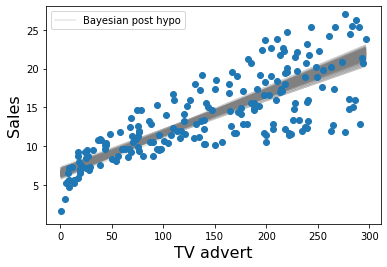

In [ ]:
for i in range(200):
    plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.2)
plt.plot(x,samples['alpha'][i]+samples['beta'][i]*x,color='gray',alpha=0.2, label='Bayesian post hypo')
plt.scatter(x,y,zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.ylim([0.01,28])
plt.legend()
#plt.savefig("post_small_reglin.pdf")

Is this a better model yes or no? Why?

Text(0, 0.5, 'Sales')

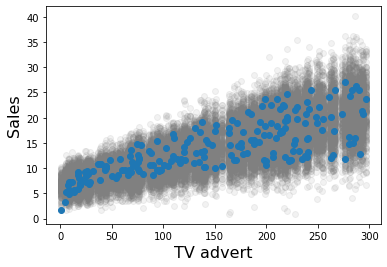

In [ ]:
xx=x
for i in range(200):
    plt.scatter(xx,pm.Normal.dist(xx*samples['beta'][i]+samples['alpha'][i],samples['sigma'][i]).random(1),c='gray',alpha=0.1)#regression line
plt.scatter(x,y,Zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
#plt.savefig("yobser_Tvsales.pdf")

Although the regression line (and relative uncertainty) of the two models are similar, the second model is able to generate datasets that are more similar to the true data.
From the above plot, it can be noticed that the variance of the grey points grows at the increase of `TV advert`.
This is similar to what we see in the true data in blue.
